# Narrativa de Datos sobre COVID-19 en LATAM

En este cuaderno, exploramos datos relacionados con la evolución de la pandemia de COVID-19 en países de América Latina (LATAM). Usamos datos históricos de casos, muertes y vacunaciones para contar una historia visual impactante sobre cómo la pandemia afectó esta región.

In [9]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


## 1. Cargar los datos
Cargamos los datos desde el archivo CSV proporcionado.

In [1]:
# Descargar la base de datos
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("davidrestrepo/challenge-covid19-in-latam")

# print("Path to dataset files:", path)

100%|██████████| 2.84M/2.84M [00:00<00:00, 6.75MB/s]

Extracting files...


Path to dataset files: C:\Users\frany\.cache\kagglehub\datasets\davidrestrepo\challenge-covid19-in-latam\versions\12


In [11]:
# Cargar los datos de casos diarios
file_path = './data/Daily_covid_cases_latam.csv'
daily_cases = pd.read_csv(file_path)

# Mostrar las primeras filas
daily_cases.head()

,location,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,...,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26
0,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,607.730,557.086,0.000,324.123,0.000,405.154,0.000,810.307,577.344
1,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,953.541,0.000,0.000,0.000,0.000
2,Bahamas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.622,55.428,123.452,221.710,161.244,156.205,73.064,131.011,0.000,317.449
3,Barbados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1630.125,1400.726,1289.502,1077.481,0.000,1637.076,451.847,1160.899,851.558,806.373
4,Belize,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,264.253,197.572,288.950,214.860,0.000,0.000,488.992,325.994,306.237,187.694


In [12]:
# Carga de los datos
raw_data_path = './data/covid_latam(raw).csv'
daily_cases_path = './data/Daily_covid_cases_latam.csv'
daily_deaths_path = './data/Daily_covid_deaths_latam.csv'
daily_vaccinations_path = './data/daily_covid_vaccinations_latam.csv'

# Cargar datos crudos
data_raw = pd.read_csv(raw_data_path)

# Datos diarios
data_daily_cases = pd.read_csv(daily_cases_path)
data_daily_deaths = pd.read_csv(daily_deaths_path)
data_daily_vaccinations = pd.read_csv(daily_vaccinations_path)

## 2. Limpieza de datos
Realizamos una limpieza básica para manejar valores faltantes y ajustar el formato.

In [13]:
# Manejo de valores faltantes
daily_cases.fillna(0, inplace=True)

# Renombrar columnas para mayor claridad (si es necesario)
daily_cases.rename(columns={'location': 'País'}, inplace=True)

# Mostrar resumen de los datos
daily_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 825 entries, País to 2022-05-26
dtypes: float64(824), object(1)
memory usage: 206.4+ KB


In [14]:
# Seleccionar un país para el análisis específico
country = 'Argentina'
data_country = data_raw[data_raw['location'] == country]

# Convertir la columna de fecha al formato datetime
data_country['date'] = pd.to_datetime(data_country['date'])

C:\Users\frany\AppData\Local\Temp\ipykernel_12736\282412313.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_country['date'] = pd.to_datetime(data_country['date'])


## 3. Visualización de datos
Generamos gráficos para observar tendencias y patrones en los datos de COVID-19.

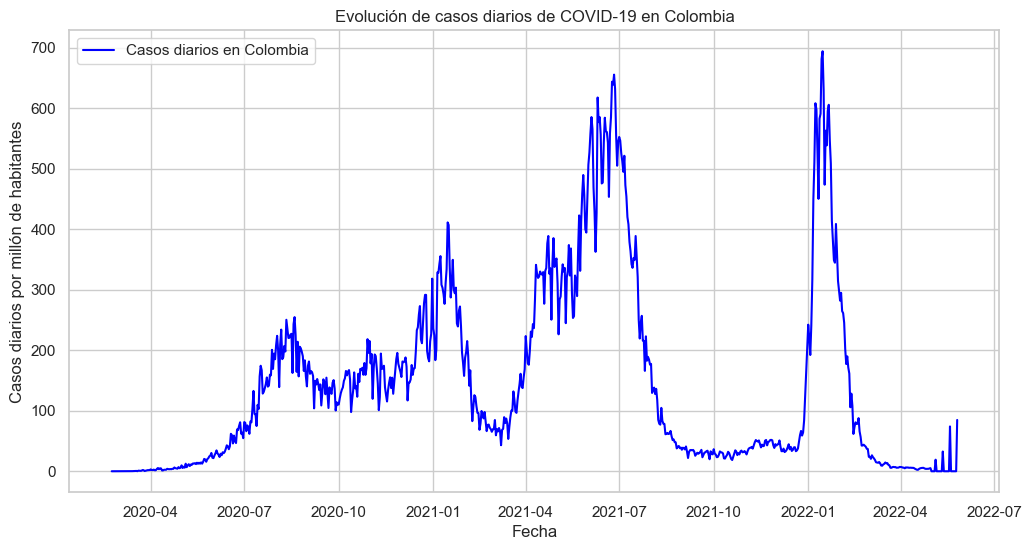

In [15]:
# Seleccionar un país para la visualización
pais_seleccionado = 'Colombia'
datos_pais = daily_cases[daily_cases['País'] == pais_seleccionado].set_index('País').T

# Convertir el índice a formato de fecha
datos_pais.index = pd.to_datetime(datos_pais.index, errors='coerce')

# Graficar los casos diarios
plt.figure(figsize=(12, 6))
plt.plot(datos_pais.index, datos_pais[pais_seleccionado], label=f'Casos diarios en {pais_seleccionado}', color='blue')
plt.title(f'Evolución de casos diarios de COVID-19 en {pais_seleccionado}')
plt.xlabel('Fecha')
plt.ylabel('Casos diarios por millón de habitantes')
plt.legend()
plt.grid(True)
plt.show()

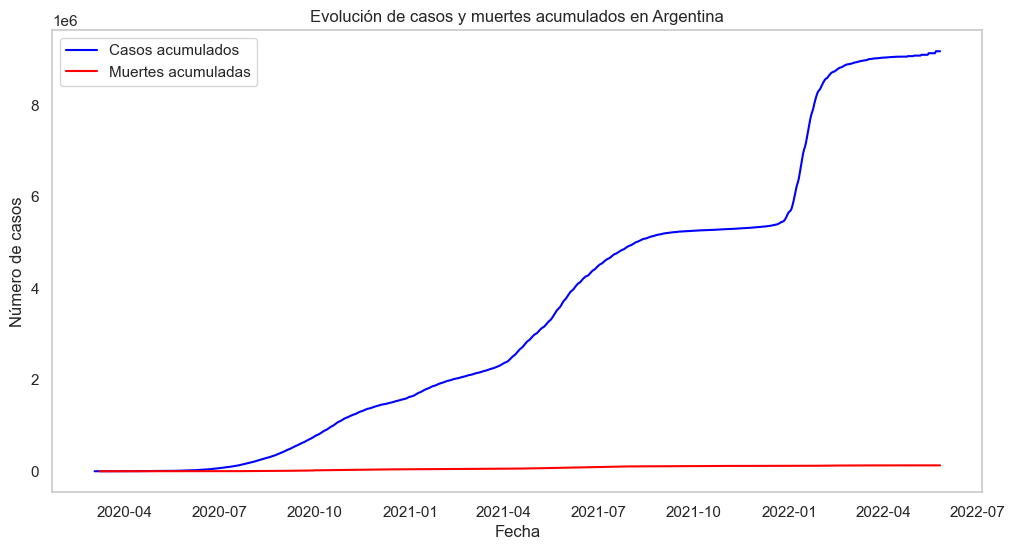

In [16]:
# Gráfico 2: Evolución de casos acumulados
plt.figure()
plt.plot(data_country['date'], data_country['total_cases'], label='Casos acumulados', color='blue')
plt.plot(data_country['date'], data_country['total_deaths'], label='Muertes acumuladas', color='red')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.title(f'Evolución de casos y muertes acumulados en {country}')
plt.legend()
plt.grid()
plt.show()

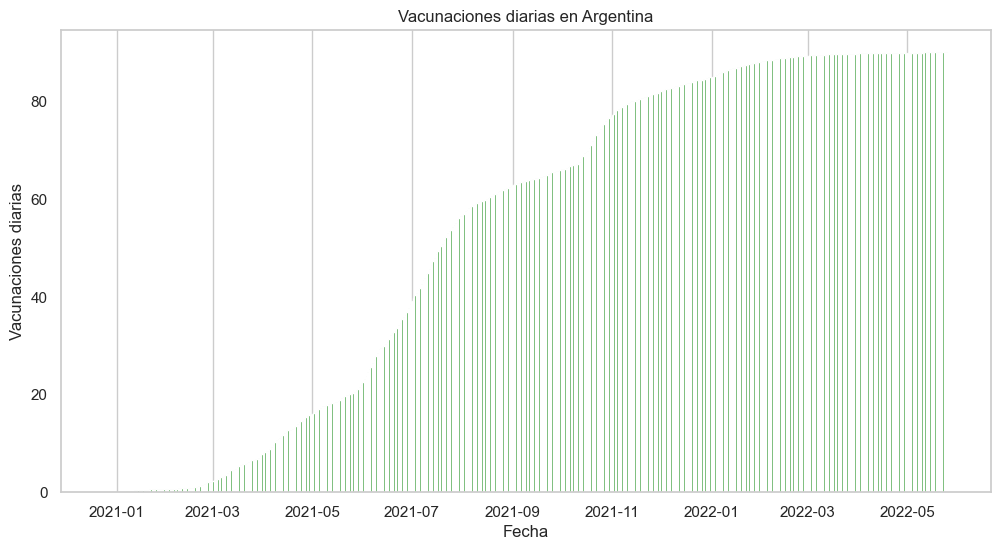

In [17]:
# Gráfico 2: Vacunación diaria en el país
data_vaccination_country = data_daily_vaccinations[data_daily_vaccinations['location'] == country]
data_vaccination_country.set_index('location', inplace=True)
data_vaccination_country = data_vaccination_country.T

# Limpieza de datos (convertir a valores numéricos)
data_vaccination_country = data_vaccination_country.apply(pd.to_numeric, errors='coerce').dropna()
data_vaccination_country.reset_index(inplace=True)
data_vaccination_country.rename(columns={'index': 'Fecha', country: 'Vacunaciones'}, inplace=True)
data_vaccination_country['Fecha'] = pd.to_datetime(data_vaccination_country['Fecha'])

plt.figure()
plt.bar(data_vaccination_country['Fecha'], data_vaccination_country['Vacunaciones'], color='green')
plt.xlabel('Fecha')
plt.ylabel('Vacunaciones diarias')
plt.title(f'Vacunaciones diarias en {country}')
plt.grid(axis='y')
plt.show()



C:\Users\frany\AppData\Local\Temp\ipykernel_12736\3853609813.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='total_cases', data=top_countries, palette='viridis')


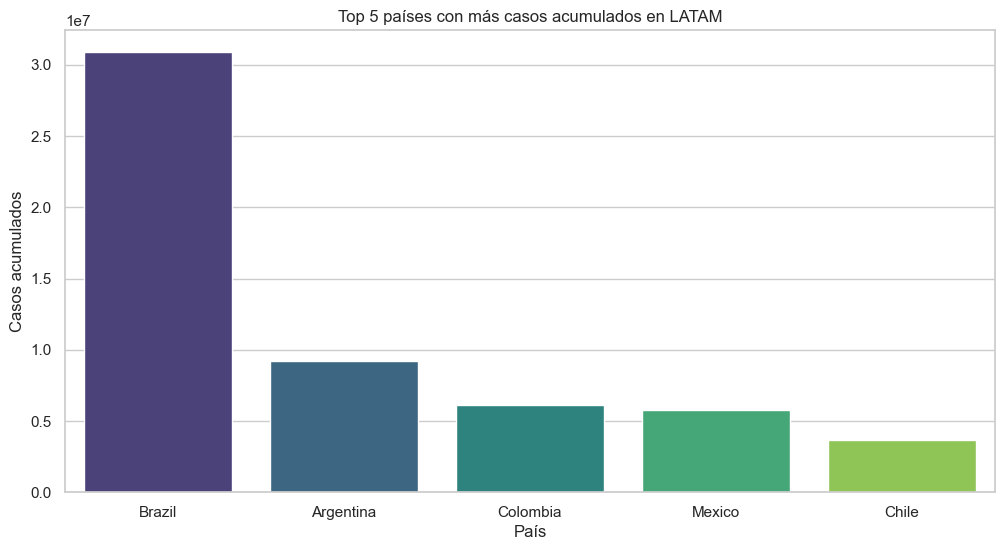

In [18]:
# Gráfico 3: Comparativa entre países (top 5 casos acumulados)
latest_data = data_raw.groupby('location').max(numeric_only=True).reset_index()
top_countries = latest_data.nlargest(5, 'total_cases')

plt.figure()
sns.barplot(x='location', y='total_cases', data=top_countries, palette='viridis')
plt.xlabel('País')
plt.ylabel('Casos acumulados')
plt.title('Top 5 países con más casos acumulados en LATAM')
plt.show()

## 4. Conclusiones
El análisis visual de los datos históricos permite observar cómo se desarrolló la pandemia en cada país, identificando momentos críticos y tendencias clave.